## Predictor tests - uses mhcpredict library

https://github.com/dmnfarrell/mhcpredict

In [11]:
import os,sys
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
home = os.path.expanduser('~')
from mhcpredict import base, sequtils
sns.set_style("ticks", {'axes.facecolor': '#F7F7F7','axes.grid': False,'legend.frameon':True})
sns.set_context("notebook", font_scale=1.6)
plt.rcParams['savefig.dpi']=150

In [9]:
infile = 'MTB-H37Rv.gb'
genome = sequtils.genbank2Dataframe(infile, cds=True)

In [25]:
names = ['Rv0240']
m='iedbmhc1'
p = base.getPredictor(m)
a=['BoLA-N:00101','BoLA-N:00201','BoLA-N:00301','BoLA-N:00401','BoLA-N:00501','BoLA-N:00601',
   'BoLA-N:00801','BoLA-N:00901','BoLA-N:01001']
#a=['BoLA-N:00201']
p.predictProteins(genome, names=names, alleles=a,length=9)
b=p.getPromiscuousBinders(n=3)

Rv0240


In [28]:
base=reload(base)
#m1='iedbmhc2'
m1 = 'tepitope'
p1 = base.getPredictor(m1)
a=['HLA-DRB1*0101']
p1.predictProteins(genome, alleles=a, names=names)
b1=p1.getBinders()
print b1

Rv0240
        peptide       core  pos  score    name         allele  rank
88  EVWVLAATPRI  WVLAATPRI   88   2.67  Rv0240  HLA-DRB1*0101     1
89  VWVLAATPRIA  WVLAATPRI   89   2.67  Rv0240  HLA-DRB1*0101     1
90  WVLAATPRIAR  WVLAATPRI   90   2.67  Rv0240  HLA-DRB1*0101     1
44  ELYQLLRNPTV  YQLLRNPTV   44   2.37  Rv0240  HLA-DRB1*0101     4
45  LYQLLRNPTVV  YQLLRNPTV   45   2.37  Rv0240  HLA-DRB1*0101     4
46  YQLLRNPTVVT  YQLLRNPTV   46   2.37  Rv0240  HLA-DRB1*0101     4


        core  allele  score    peptide    name  pos
2  MKTDAATLA       3    3.3  MKTDAATLA  Rv3874    3
1  ISGDLKTQI       2    4.0  ISGDLKTQI  Rv3874   20
4  WRGAAGTAA       7    2.7  WRGAAGTAA  Rv3874   42
3  VRFQEAANK       8    4.0  VRFQEAANK  Rv3874   55
0  IRQAGVQYS      12    4.4  IRQAGVQYS  Rv3874   75


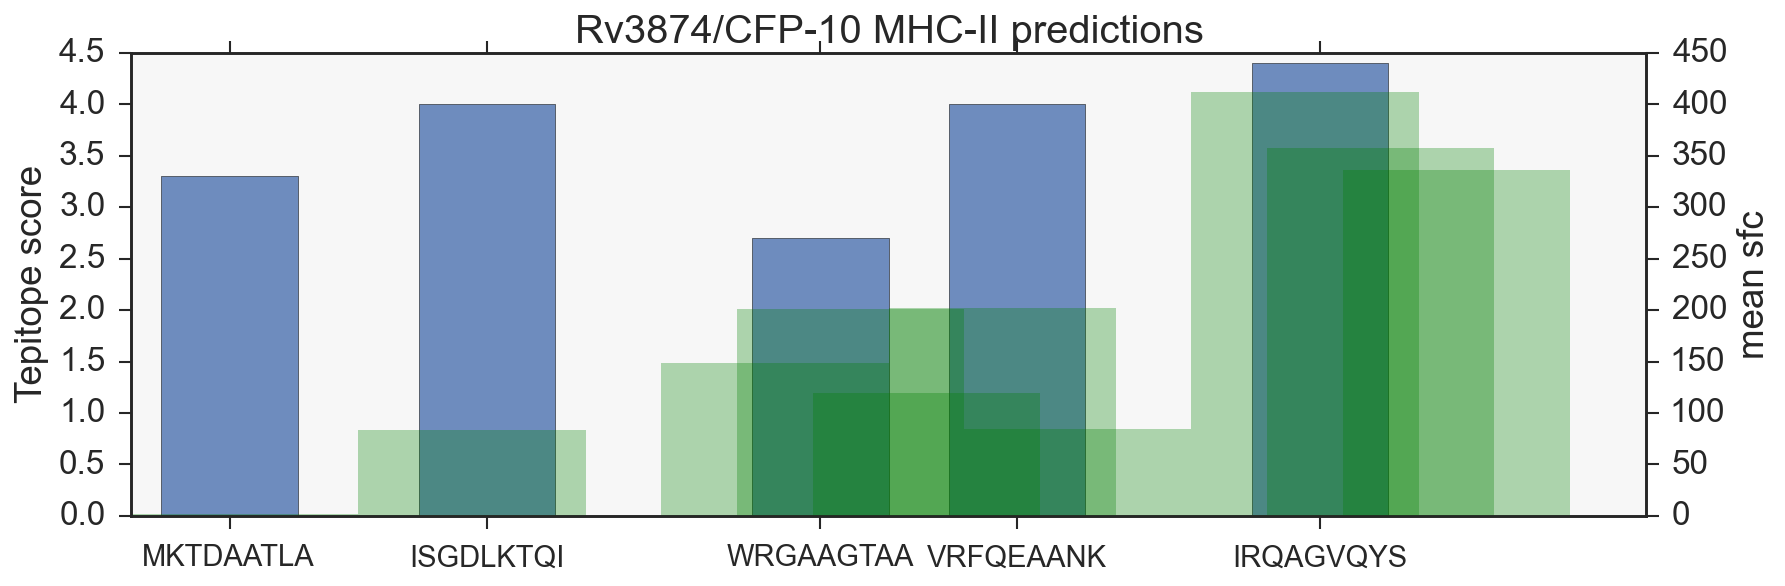

In [29]:
df = pd.read_msgpack('Rv3874_human.mpk')
p = Base.getPredictor('tepitope', data=df)
exp = pd.read_csv('cfp10_regions.csv')

def plotbinders(p, exp=exp):
    b=p.getPromiscuousBinders(n=2)
    b=b.sort('pos')
    seq = p.data.sort('pos').pos.unique()   
    print b
    f,ax=plt.subplots(1,1,figsize=(12,4))
    ax.bar(b.pos,b.score,width=9,alpha=0.8)
    ax.set_ylabel('Tepitope score')
    ax.set_xticks(b.pos+4.5)
    ax.set_xticklabels(b.core.values,fontsize=14)
    ax1=plt.twinx(ax)
    #ax1.plot(exp.pos,exp.mean_sfc,alpha=0.8,color='black',lw=2,marker='o')  
    ax1.bar(exp.pos,exp.mean_sfc,alpha=0.3,color='green',lw=0,width=15)#,drawstyle='steps')
    ax1.set_ylabel('mean sfc')
    ax.set_title('Rv3874/CFP-10 MHC-II predictions')
    plt.tight_layout()
    plt.savefig('Rv3874_lindestam.png')    
    return

plotbinders(p,exp) 
